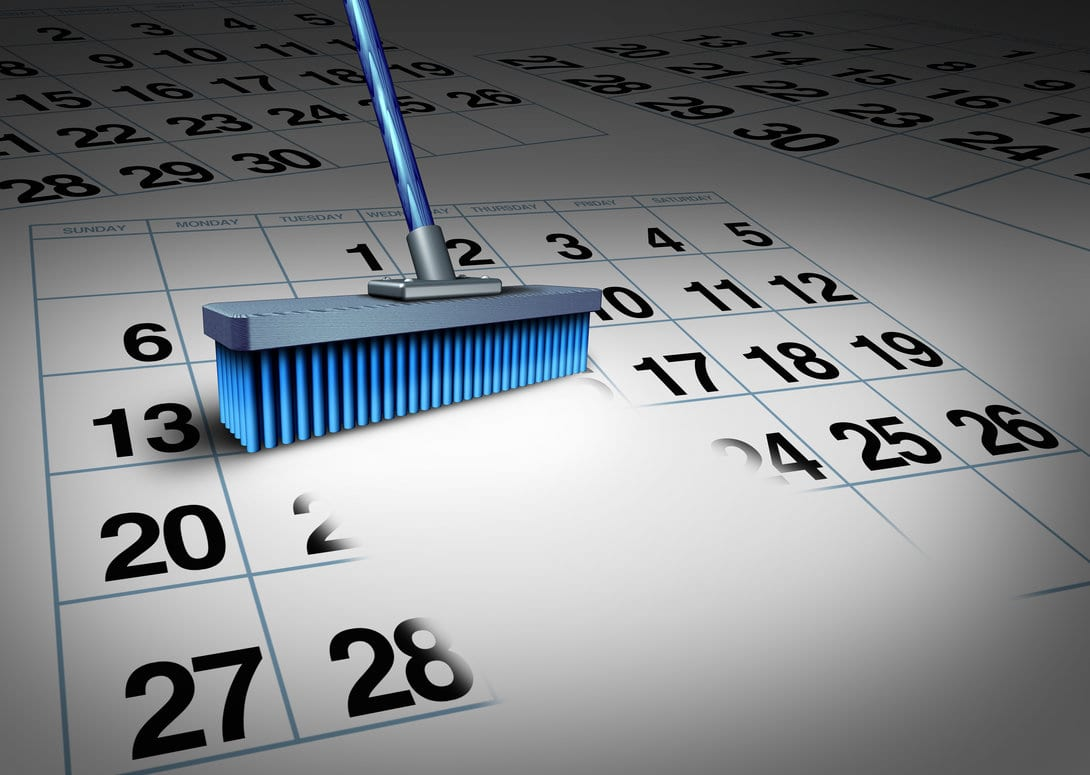

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘 About Data</p> 

<div style="border-radius:10px;border:#d5e8e4 solid;background-color:#edf2f1; padding:15px; font-size:15px">
    
**Context**

In finance, a stock index, or stock market index, is an index that measures a stock market, or a subset of the stock market, that helps investors compare current stock price levels with past prices to calculate market performance.

<div style="border-radius:10px;border:#d5e8e4 solid;background-color:#edf2f1; padding:15px; font-size:15px">
    
**About Data**

|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | **Index** | A stock market index is a measure of the performance of a particular group of stocks representing a portion of the overall market |                
| **2** | **Date** | The date refers to the specific day on which the stock market data was recorded |                        
| **3** | **Open** | The price of the security at the beginning of the trading day |
| **4** | **High** | The highest price at which the security traded during the day |
| **5** | **Low** | The lowest price at which the security is traded during the day |                     
| **6** | **Close** | The price of the security at the end of the trading day |
| **7** | **Adj Close** | The adjusted closing price takes into account any corporate actions, such as stock splits, dividends, or rights offerings, that occurred after the markets closed. It reflects the closing price of the stock adjusted for these actions |  
| **8** | **Volume** | The total number of shares or contracts that were traded during the day |                      

##### We consider "Adj Close" as the target🎯

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘 Import Libraries</p> 

#### Step 1) Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Candlestick
import plotly.graph_objs as go
import plotly

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘 Read the dataset</p> 

#### Step 2) Read the dataset

In [2]:
Data = pd.read_csv('E:/Market.csv')
Data.head()

Index        Date        Open        High         Low       Close  \
0   NYA  12/31/1965  528.690002  528.690002  528.690002  528.690002   
1   NYA    1/3/1966  527.210022  527.210022  527.210022  527.210022   
2   NYA    1/4/1966  527.840027  527.840027  527.840027  527.840027   
3   NYA    1/5/1966  531.119995  531.119995  531.119995  531.119995   
4   NYA    1/6/1966  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘 Preprocessing</p> 

#### Step 3) Construct a Dataframe 

In [3]:
df = pd.DataFrame(Data)

In [4]:
# View dimensions of dataset   
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (112457, 8)
Rows: 112457 
Columns: 8


#### Step 4) Pick up a unique index ➡️'NYA'

In [5]:
df1 = df[(df['Index'] == 'NYA')]    
df1.head(5).style.set_properties(**{'background-color': '#c8dbd7'}, subset=['Index'])

In [6]:
# View dimensions of dataset   
rows, col = df1.shape
print ("Dimensions of dataset: {}" . format (df1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (13948, 8)
Rows: 13948 
Columns: 8


In [7]:
# Dtype
print(f'The data type contains:\n object --> {df1.dtypes.value_counts()[1]}\n float64 --> {df1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 2
 float64 --> 6


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13948 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13946 non-null  float64
 4   Low        13945 non-null  float64
 5   Close      13944 non-null  float64
 6   Adj Close  13938 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.7+ KB


#### Step 5) Transform the datatype from 'object' ➡️ 'Int64' type

In [9]:
df2 = df1.copy()   

In [10]:
float_cols = df1.columns.drop(["Date", "Index"])
df2[float_cols] = df[float_cols].round().astype("Int64")
df2.head()

Index        Date  Open  High  Low  Close  Adj Close  Volume
0   NYA  12/31/1965   529   529  529    529        529       0
1   NYA    1/3/1966   527   527  527    527        527       0
2   NYA    1/4/1966   528   528  528    528        528       0
3   NYA    1/5/1966   531   531  531    531        531       0
4   NYA    1/6/1966   532   532  532    532        532       0

In [11]:
# Dtype
print(f'The data type contains:\n object --> {df2.dtypes.value_counts()[1]}\n int64 --> {df2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 2
 int64 --> 6


#### Step 6) Transform the 'Date' datatype into datetime

In [12]:
df2['Date'] = pd.to_datetime(df2['Date'], utc=True)   
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13948 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Index      13948 non-null  object             
 1   Date       13948 non-null  datetime64[ns, UTC]
 2   Open       13947 non-null  Int64              
 3   High       13946 non-null  Int64              
 4   Low        13945 non-null  Int64              
 5   Close      13944 non-null  Int64              
 6   Adj Close  13938 non-null  Int64              
 7   Volume     13947 non-null  Int64              
dtypes: Int64(6), datetime64[ns, UTC](1), object(1)
memory usage: 1.0+ MB


In [13]:
df2.sort_values(by="Date")
df2.head(5).style.set_properties(**{'background-color': '#c8dbd7'}, subset=['Date'])

In [14]:
# Plotting count plot by year
Year = df2['Date'].dt.year

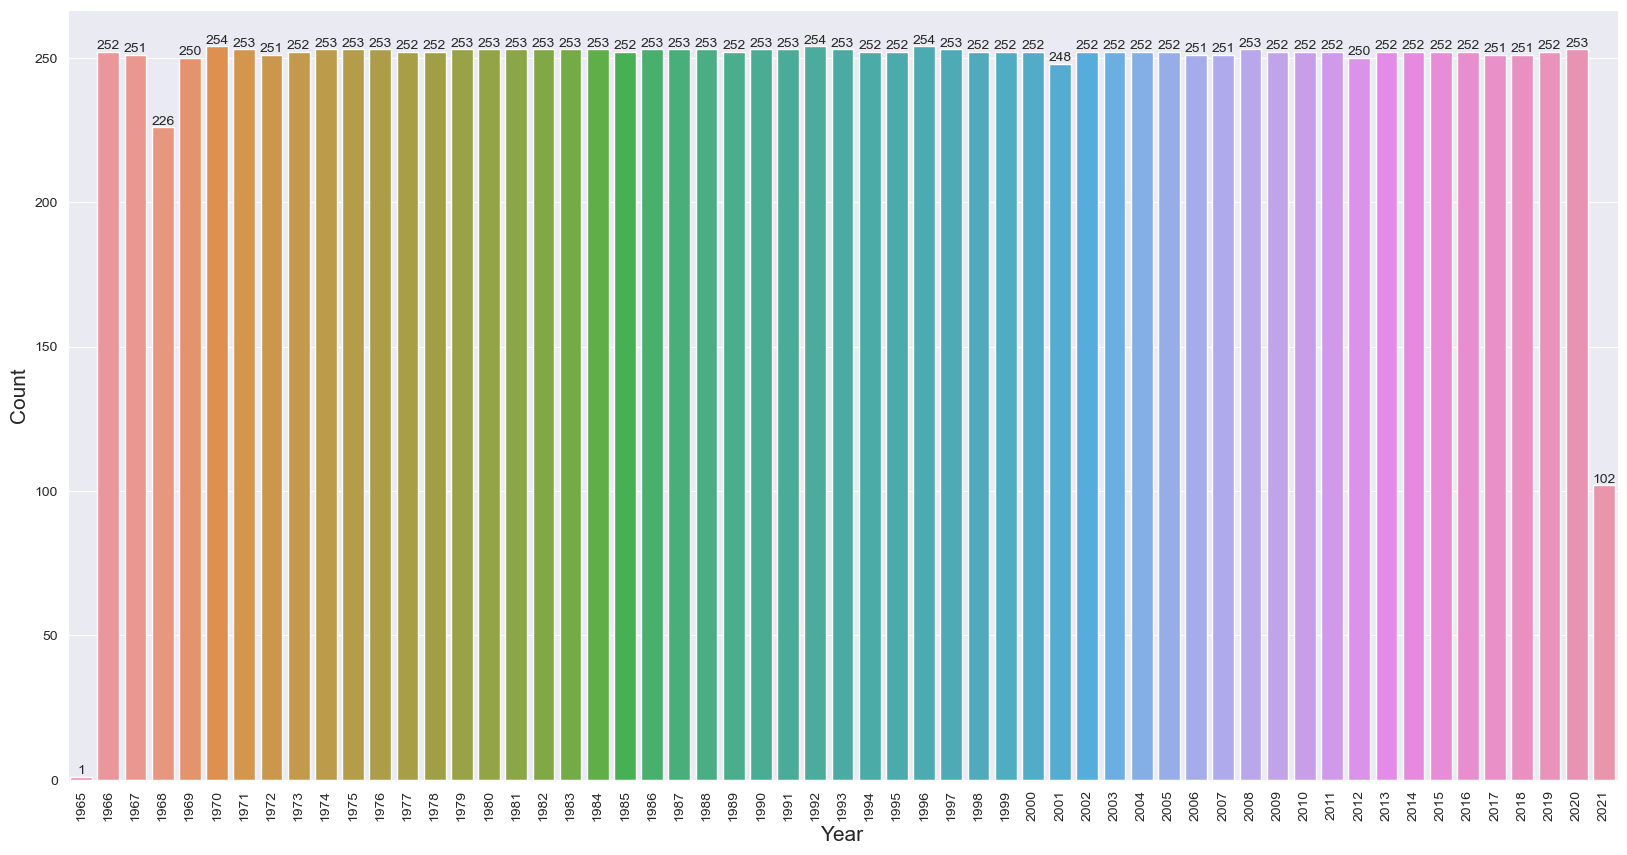

In [15]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=df2, x=Year)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

#### Step 7) Drop the zero index of Date ➡️ 'year=1965', because of the lack of data (just one record)

In [16]:
df3=df2.drop(labels=0, axis=0)
df3

Index                      Date   Open   High    Low  Close  Adj Close  \
1       NYA 1966-01-03 00:00:00+00:00    527    527    527    527        527   
2       NYA 1966-01-04 00:00:00+00:00    528    528    528    528        528   
3       NYA 1966-01-05 00:00:00+00:00    531    531    531    531        531   
4       NYA 1966-01-06 00:00:00+00:00    532    532    532    532        532   
5       NYA 1966-01-07 00:00:00+00:00    533    533    533    533        533   
...     ...                       ...    ...    ...    ...    ...        ...   
13943   NYA 2021-05-24 00:00:00+00:00  16375  16509  16375  16465      16465   
13944   NYA 2021-05-25 00:00:00+00:00  16465  16526  16375  16390      16390   
13945   NYA 2021-05-26 00:00:00+00:00  16390  16466  16388  16452      16452   
13946   NYA 2021-05-27 00:00:00+00:00  16452  16546  16452  16532      16532   
13947   NYA 2021-05-28 00:00:00+00:00  16532  16589  16532  16556      16556   

           Volume  
1               0  
2               0  
3               0  
4               0  
5               0  
...           ...  
13943  2947400000  
13944  3420870000  
13945  3674490000  
13946  5201110000  
13947  4199270000  

[13947 rows x 8 columns]

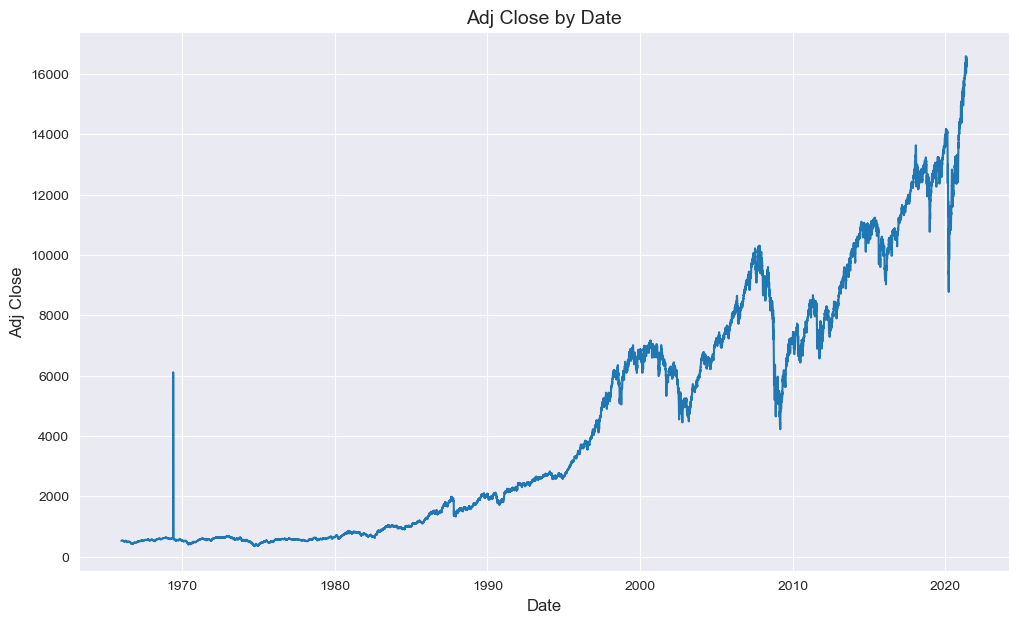

In [17]:
# Plotting the target-date linear graph
plt.figure(figsize=(12, 7))
sns.lineplot(data=df3, x="Date", y="Adj Close")
plt.title("Adj Close by Date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adj Close", fontsize=12)
plt.grid(True)
plt.show()

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘Noise Detection</p> 

In [18]:
df3.describe()

Open          High           Low         Close     Adj Close  \
count  13946.000000  13945.000000  13944.000000  13943.000000  13937.000000   
mean    4452.426144   4469.596056   4434.540806   4453.307466   4455.375619   
std     4074.843581   4094.970808   4052.825308   4075.495273   4075.468060   
min      348.000000    348.000000    348.000000    348.000000    348.000000   
25%      655.000000    655.000000    655.000000    655.000000    656.000000   
50%     2632.000000   2632.000000   2632.000000   2632.000000   2633.000000   
75%     7340.750000   7377.000000   7278.000000   7340.500000   7343.000000   
max    16590.000000  16686.000000  16532.000000  16590.000000  16590.000000   

             Volume  
count  1.394600e+04  
mean   1.215653e+09  
std    1.834191e+09  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    2.682332e+09  
max    1.145623e+10

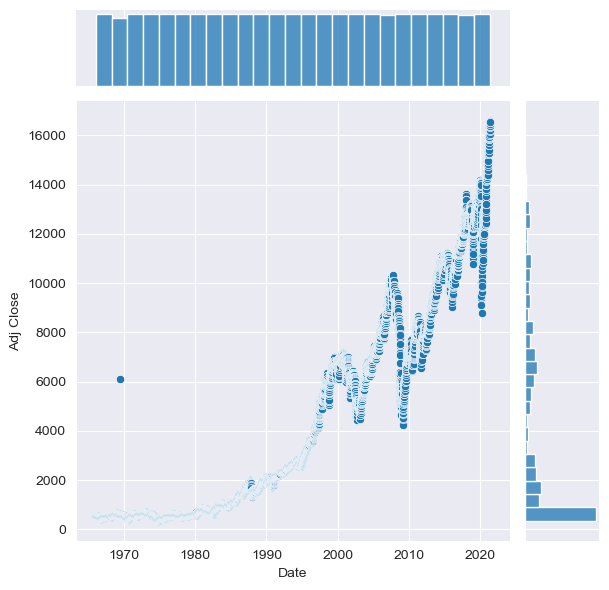

In [19]:
# Target-Date
sns.jointplot(data=df3, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

In [20]:
# Adj Close > 5000, Date < 1975
df3[(df3['Adj Close']>5000)&(df3.Date.dt.year<1975)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
831   NYA 1969-05-29 00:00:00+00:00   612   612  612    612       6111       0

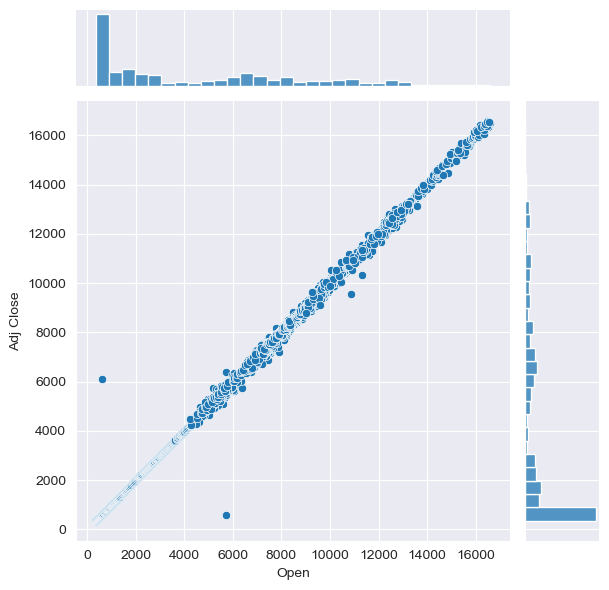

In [21]:
# Target-Open
sns.jointplot(data=df3, x="Open", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Open", fontsize=11)
plt.show()

In [22]:
# 1- Adj Close > 5000, Open < 1000 
df3[(df3['Adj Close']>5000)&(df3.Open<1000)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
831   NYA 1969-05-29 00:00:00+00:00   612   612  612    612       6111       0

In [23]:
# 2- Adj Close < 1000, Open > 5000
df3[(df3['Adj Close']<1000)&(df3.Open>5000)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
852   NYA 1969-06-30 00:00:00+00:00  5722   572  572    572        572       0

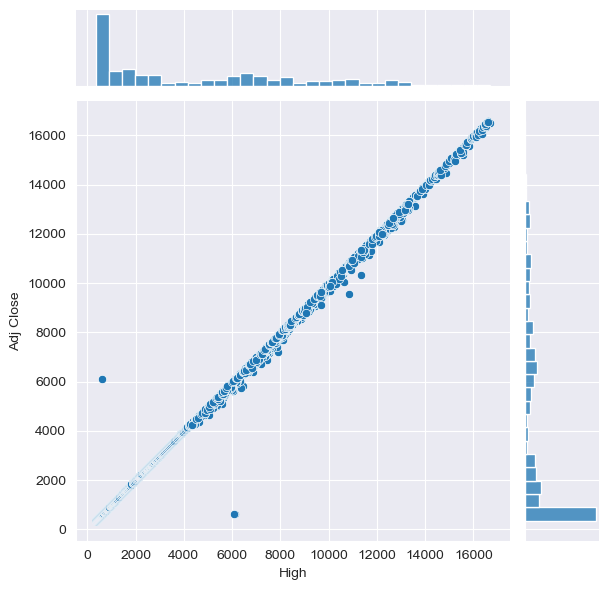

In [24]:
# Target-High
sns.jointplot(data=df3, x="High", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("High", fontsize=11)
plt.show()

In [25]:
# 1- Adj Close > 5000, High < 1000
df3[(df3['Adj Close']>5000)&(df3.High<1000)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
831   NYA 1969-05-29 00:00:00+00:00   612   612  612    612       6111       0

In [26]:
# 2- Adj Close < 1000, High > 5000 
df3[(df3['Adj Close']<1000)&(df3.High>5000)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
829   NYA 1969-05-27 00:00:00+00:00   612  6124  612    612        612       0
833   NYA 1969-06-03 00:00:00+00:00   607  6066  607    607        607       0

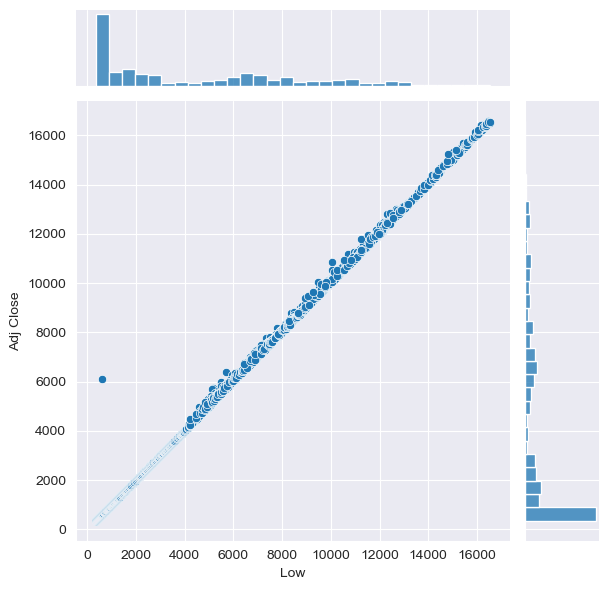

In [27]:
# Target-Low
sns.jointplot(data=df3, x="Low", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Low", fontsize=11)
plt.show()

In [28]:
# Adj Close > 5000, Low < 1000
df3[(df3['Adj Close']>5000)&(df3.Low<1000)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
831   NYA 1969-05-29 00:00:00+00:00   612   612  612    612       6111       0

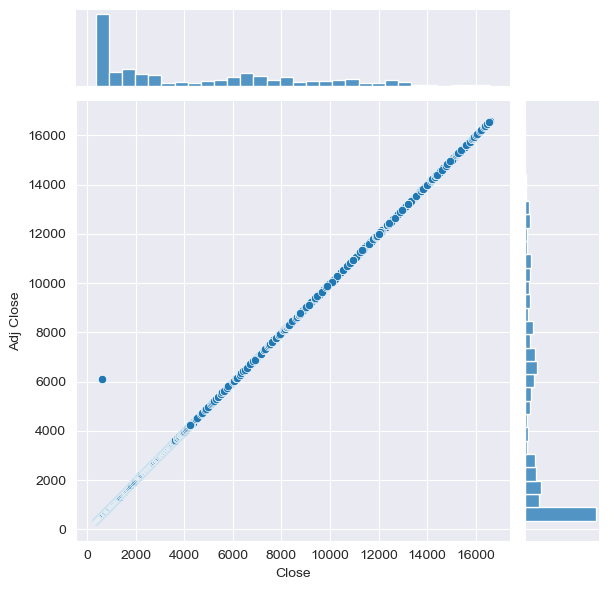

In [29]:
# Target-Close
sns.jointplot(data=df3, x="Close", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Close", fontsize=11)
plt.show()

In [30]:
# Adj Close > 5000, Close < 1000
df3[(df3['Adj Close']>5000)&(df3.Close<1000)]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
831   NYA 1969-05-29 00:00:00+00:00   612   612  612    612       6111       0

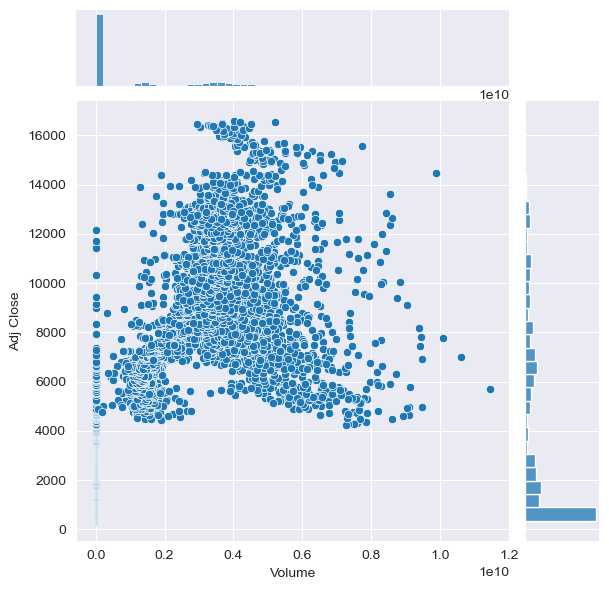

In [31]:
# Target-Volume
sns.jointplot(data=df3, x="Volume", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Volume", fontsize=11)
plt.show()

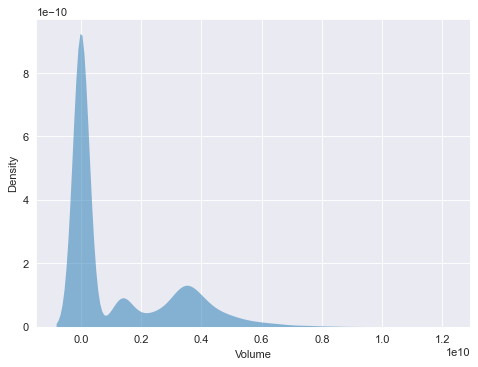

In [32]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=df3, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [33]:
# Assessing the 0 values of the "Volume" column
len(df3[df3["Volume"]==0])

8831

##### 🔸Approximately 63% of the data in the "Volume" column is considered noise

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘Handling Missing Values in the Dataset</p> 

#### Step 1) Find 'NAN' values for each column

In [34]:
missing_values = pd.DataFrame(df3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Index                   0
Date                    0
Open                    1
High                    2
Low                     3
Close                   4
Adj Close              10
Volume                  1

In [35]:
# Detecting the NAN values indexes
df3[df3.isnull().any(axis=1)]

Index                      Date  Open  High   Low  Close  Adj Close  \
102   NYA 1966-05-26 00:00:00+00:00   497   497  <NA>    497        497   
104   NYA 1966-05-31 00:00:00+00:00   492   492   492   <NA>        492   
154   NYA 1966-08-10 00:00:00+00:00   477   477   477    477       <NA>   
170   NYA 1966-09-01 00:00:00+00:00   443   443   443   <NA>        443   
190   NYA 1966-09-30 00:00:00+00:00   437  <NA>   437    437        437   
231   NYA 1966-11-30 00:00:00+00:00   461   461  <NA>    461        461   
257   NYA 1967-01-09 00:00:00+00:00   477   477   477    477       <NA>   
282   NYA 1967-02-13 00:00:00+00:00   507   507   507    507       <NA>   
289   NYA 1967-02-23 00:00:00+00:00  <NA>  <NA>  <NA>   <NA>       <NA>   
307   NYA 1967-03-21 00:00:00+00:00   521   521   521    521       <NA>   
333   NYA 1967-04-27 00:00:00+00:00   544   544   544    544       <NA>   
353   NYA 1967-05-25 00:00:00+00:00   532   532   532    532       <NA>   
464   NYA 1967-11-01 00:00:00+00:00   544   544   544   <NA>        544   
635   NYA 1968-07-19 00:00:00+00:00   598   598   598    598       <NA>   
700   NYA 1968-11-12 00:00:00+00:00   623   623   623    623       <NA>   
800   NYA 1969-04-16 00:00:00+00:00   595   595   595    595       <NA>   

     Volume  
102       0  
104       0  
154       0  
170       0  
190       0  
231       0  
257       0  
282       0  
289    <NA>  
307       0  
333       0  
353       0  
464       0  
635       0  
700       0  
800       0

In [36]:
def highlight_null(val):
    color = 'red' if pd.isna(val) else 'white'
    return f'background-color: {color}'

missing_df = df3[df3.isnull().any(axis=1)]
missing_df = missing_df.style.applymap(highlight_null)
missing_df

#### Step 2) Drop a row with 6 'NaN' values

In [37]:
# Dropping the 289 index = 6 missing values
df4=df3.dropna(thresh=6)    

#### Step 3) Fill the 'NAN' values

In [38]:
df5 = df4.fillna(method = "pad")

In [39]:
# After filling the NAN values
df5.iloc[[101, 103, 153, 169, 189, 230, 256, 281, 305, 331, 351, 462, 633, 698, 798]]

Index                      Date  Open  High  Low  Close  Adj Close  Volume
102   NYA 1966-05-26 00:00:00+00:00   497   497  497    497        497       0
104   NYA 1966-05-31 00:00:00+00:00   492   492  492    498        492       0
154   NYA 1966-08-10 00:00:00+00:00   477   477  477    477        479       0
170   NYA 1966-09-01 00:00:00+00:00   443   443  443    440        443       0
190   NYA 1966-09-30 00:00:00+00:00   437   435  437    437        437       0
231   NYA 1966-11-30 00:00:00+00:00   461   461  461    461        461       0
257   NYA 1967-01-09 00:00:00+00:00   477   477  477    477        473       0
282   NYA 1967-02-13 00:00:00+00:00   507   507  507    507        506       0
307   NYA 1967-03-21 00:00:00+00:00   521   521  521    521        523       0
333   NYA 1967-04-27 00:00:00+00:00   544   544  544    544        540       0
353   NYA 1967-05-25 00:00:00+00:00   532   532  532    532        527       0
464   NYA 1967-11-01 00:00:00+00:00   544   544  544    551        544       0
635   NYA 1968-07-19 00:00:00+00:00   598   598  598    598        604       0
700   NYA 1968-11-12 00:00:00+00:00   623   623  623    623        618       0
800   NYA 1969-04-16 00:00:00+00:00   595   595  595    595        600       0

In [40]:
# Checking the missing values
missing_values = pd.DataFrame(df5.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Index                   0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [41]:
# All indexes which were detected noise
detected_noise = df5.iloc[[827, 829, 831, 850]]

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘Eliminating Noise: Removing Indexes with Outlier Values</p> 

In [42]:
detected_noise

Index                      Date  Open  High  Low  Close  Adj Close  Volume
829   NYA 1969-05-27 00:00:00+00:00   612  6124  612    612        612       0
831   NYA 1969-05-29 00:00:00+00:00   612   612  612    612       6111       0
833   NYA 1969-06-03 00:00:00+00:00   607  6066  607    607        607       0
852   NYA 1969-06-30 00:00:00+00:00  5722   572  572    572        572       0

In [43]:
# Index = 831
df5.drop(df5[(df5['Adj Close']>5000)&(df5.Date.dt.year<1975)].index, inplace=True)

In [44]:
# Index = 852
df5.drop(df5[(df5['Adj Close']<1000)&(df5.Open>5000)].index, inplace=True)  

In [45]:
# Index = 829, 833
df5.drop(df5[(df5['Adj Close']<1000)&(df5.High>5000)].index, inplace=True)

In [46]:
# Dropping the "Volume" column because of the high missing values
df6 = df5.drop("Volume", axis= 1)

In [47]:
# Duplicated data
df6.duplicated().sum()

0

In [48]:
# Final dataset
print('Final Dataset:')
df6.describe()

Final Dataset:


Open          High           Low         Close     Adj Close
count  13942.000000  13942.000000  13942.000000  13942.000000  13942.000000
mean    4453.161813   4469.629752   4435.073304   4453.561325   4453.560321
std     4075.024126   4095.244293   4052.872627   4075.532392   4075.533362
min      348.000000    348.000000    348.000000    348.000000    348.000000
25%      655.000000    655.000000    655.000000    655.000000    655.000000
50%     2632.000000   2632.000000   2632.000000   2632.000000   2632.000000
75%     7342.750000   7377.000000   7278.000000   7341.250000   7341.250000
max    16590.000000  16686.000000  16532.000000  16590.000000  16590.000000

<a id="1"></a> 
# <p style="padding:15px;background-color:#c8dbd7;margin:0;color:#393d3c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:600">🔘Cleaned Data Visualization: Insights After Removing Missing and Noise Values</p> 

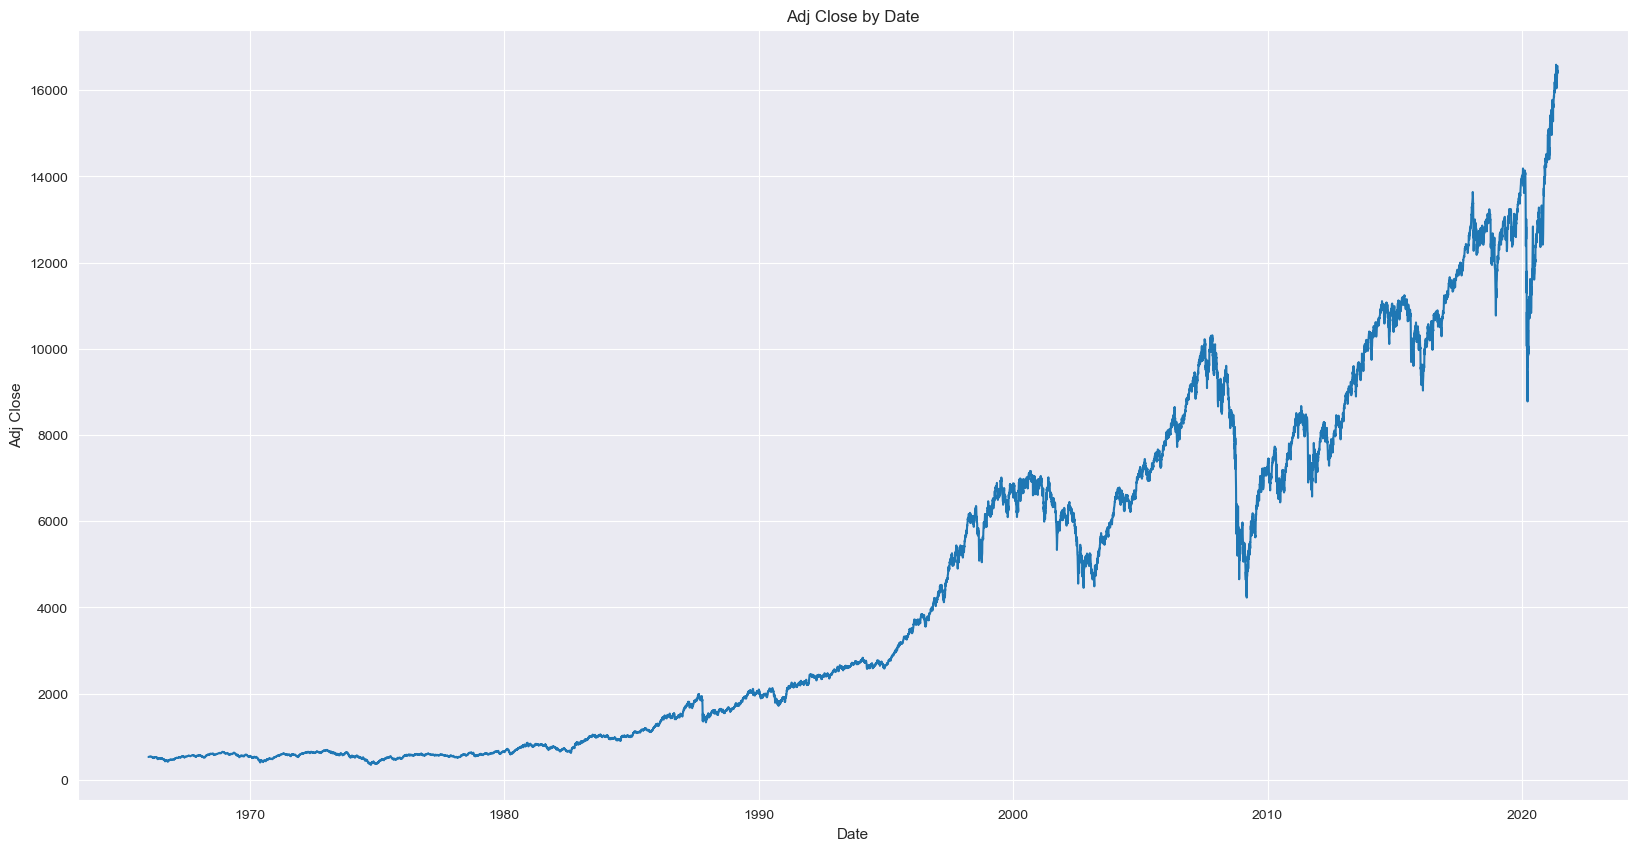

In [49]:
# Adj Close vs. Date
plt.figure(figsize = (20, 10))
sns.lineplot(data=df6, x="Date", y="Adj Close")
sns.color_palette("flare", as_cmap=True)
sns.set_style('darkgrid')
plt.title("Adj Close by Date")
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

In [50]:
fig = go.Figure(data=[go.Candlestick(
    x=df6['Date'],
    open=df6['Open'],
    high=df6['High'],
    low=df6['Low'],
    close=df6['Close'])])
fig.show()

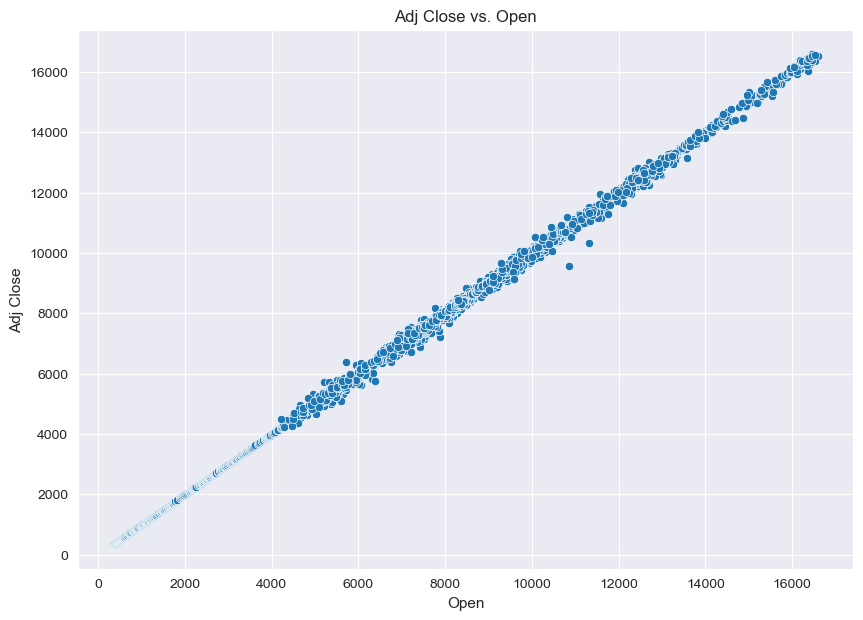

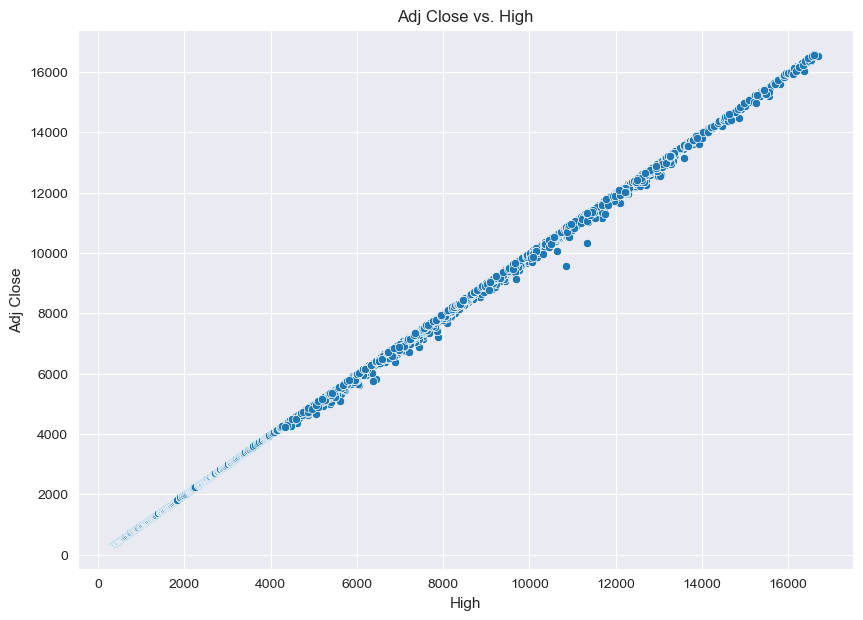

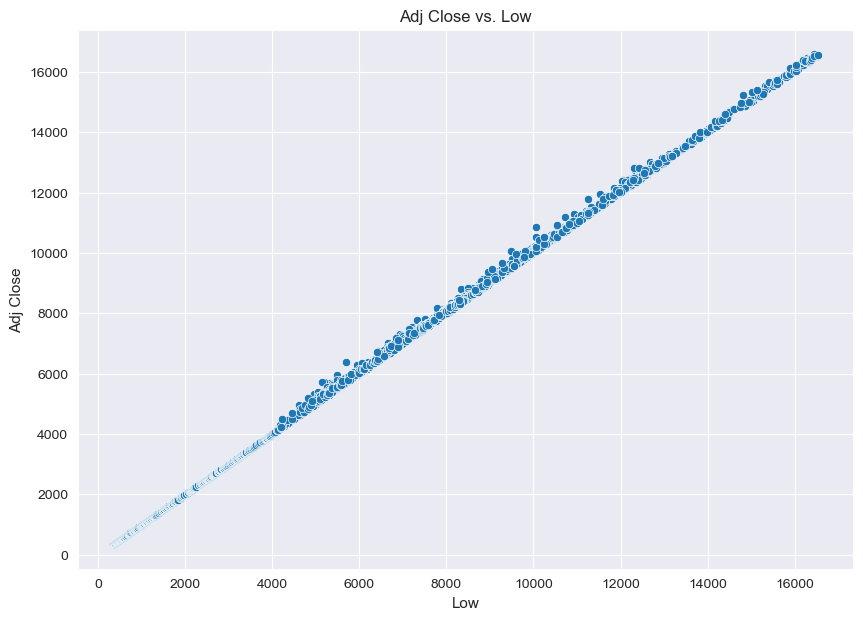

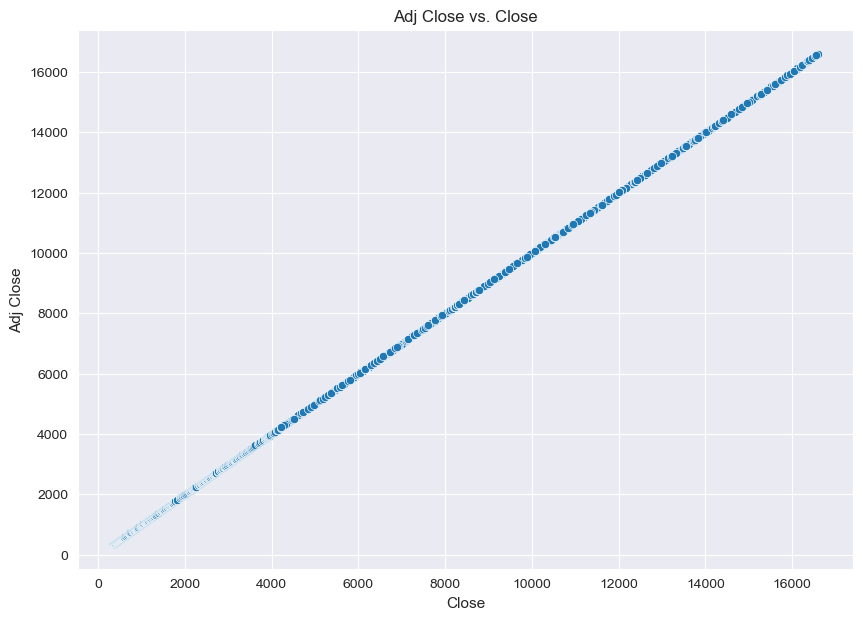

In [51]:
# Adj Close vs. Open
plt.figure(figsize = (10, 7))
sns.scatterplot(data=df6, x="Open", y="Adj Close")
sns.color_palette("flare", as_cmap=True)
sns.set_style('darkgrid')
plt.title("Adj Close vs. Open")
plt.xlabel("Open", size=11)
plt.ylabel("Adj Close", fontsize=11)

# Adj Close vs. High
plt.figure(figsize = (10, 7))
sns.scatterplot(data=df6, x="High", y="Adj Close")
sns.color_palette("flare", as_cmap=True)
sns.set_style('darkgrid')
plt.title("Adj Close vs. High")
plt.xlabel("High", size=11)
plt.ylabel("Adj Close", fontsize=11)

# Adj Close vs. Low
plt.figure(figsize = (10, 7))
sns.scatterplot(data=df6, x="Low", y="Adj Close")
sns.color_palette("flare", as_cmap=True)
sns.set_style('darkgrid')
plt.title("Adj Close vs. Low")
plt.xlabel("Low", size=11)
plt.ylabel("Adj Close", fontsize=11)

# Adj Close vs. Close
plt.figure(figsize = (10, 7))
sns.scatterplot(data=df6, x="Close", y="Adj Close")
sns.color_palette("flare", as_cmap=True)
sns.set_style('darkgrid')
plt.title("Adj Close vs. Close")
plt.xlabel("Close", size=11)
plt.ylabel("Adj Close", fontsize=11)

plt.show()

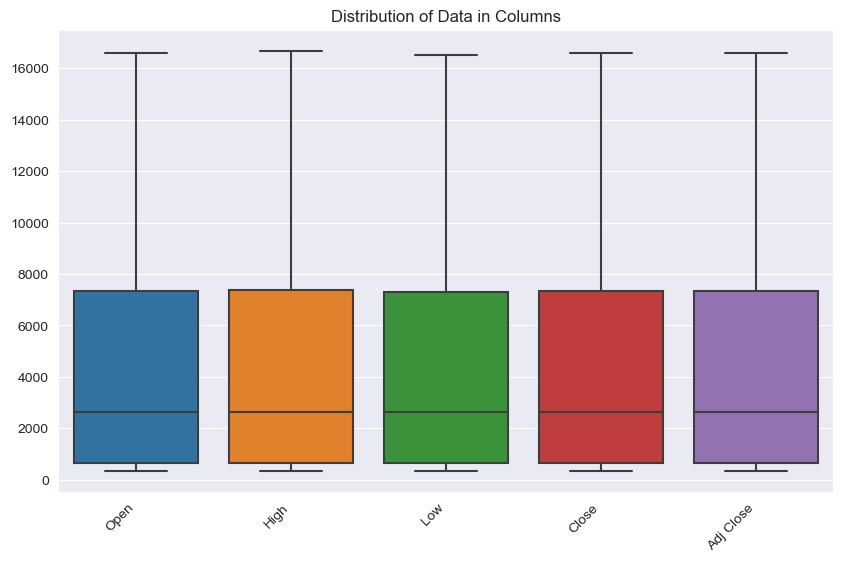

In [52]:
# Plotting a box plot to visualize the distribution of the data in the columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df6)
sns.set_style('darkgrid')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Data in Columns')
plt.show()

**Well Done👍**

<div <h4 style="border-radius:10px;border:#d5e8e4 solid;padding: 15px;background-color:#edf2f1;font-size:90%;text-align:center"> 
</h4>
      <h4 class="alert-heading">Thank you for taking the time to consider this matter</h4>
  <hr>
  
  <h4><b>Author:</b> Ali Farahmandfar</h4>
  <hr>       
  
<h4><strong> If you enjoyed this Notebook, please give it an upvote </strong>
    
<h4><strong> 💫Best Wishes💫 </strong>